In [1]:
!pip install pandas-datareader --upgrade --quiet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
import pandas_datareader.data as web

In [4]:
indus = web.DataReader('INDUSINDBK.NS','yahoo',start ='2004-01-01',end = '2020-10-21')

In [6]:
indus.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-12,632.000000,610.500000,628.200012,614.450012,11751051.0,614.450012
2020-10-13,620.750000,602.450012,611.599976,608.200012,11579298.0,608.200012
2020-10-14,626.450012,597.500000,600.000000,622.650024,14624404.0,622.650024
2020-10-15,632.500000,593.349976,622.650024,598.000000,14728367.0,598.000000
2020-10-16,613.900024,601.400024,604.799988,608.299988,11569890.0,608.299988


In [8]:
data = indus.to_csv('indus.csv')
data = pd.read_csv('indus.csv',date_parser = True)
data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
4140,2020-10-12,632.000000,610.500000,628.200012,614.450012,11751051.0,614.450012
4141,2020-10-13,620.750000,602.450012,611.599976,608.200012,11579298.0,608.200012
4142,2020-10-14,626.450012,597.500000,600.000000,622.650024,14624404.0,622.650024
4143,2020-10-15,632.500000,593.349976,622.650024,598.000000,14728367.0,598.000000
4144,2020-10-16,613.900024,601.400024,604.799988,608.299988,11569890.0,608.299988


In [20]:
data_training1 = data[data['Date']<'2019-01-01'].copy()
data_test1 = data[data['Date']>='2019-01-01'].copy()

data_training = data[data['Date']<'2019-01-01'].copy()
data_test = data[data['Date']>='2019-01-01'].copy()

In [21]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [22]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.0076391 , 0.00801598, 0.00809686, 0.00816777, 0.0185912 ],
       [0.00900766, 0.00862287, 0.01023942, 0.00839326, 0.03190957],
       [0.00806211, 0.00811713, 0.00901866, 0.00771678, 0.02058655],
       ...,
       [0.77876478, 0.7755778 , 0.77273974, 0.76997468, 0.10274167],
       [0.78227332, 0.78129269, 0.77366152, 0.77962066, 0.0728834 ],
       [0.78401513, 0.78867649, 0.779865  , 0.78766317, 0.0509799 ]])

In [23]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [24]:
X_train.shape

(3644, 60, 5)

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [26]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

In [27]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)               96480     
__________

In [28]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=1, batch_size=32)

3644/3644 [==============================] - 131s 36ms/sample - loss: 0.0143


In [29]:
data_test.head()

,Date,High,Low,Open,Close,Volume,Adj Close
3704,2019-01-01,1605.0,1560.550049,1600.000000,1595.599976,4043870.0,1587.209961
3705,2019-01-02,1598.0,1568.250000,1587.599976,1576.599976,1164974.0,1568.309937
3706,2019-01-03,1580.0,1555.650024,1573.000000,1560.099976,958038.0,1551.896606
3707,2019-01-04,1571.0,1540.199951,1560.800049,1548.199951,1868151.0,1540.059204
3708,2019-01-07,1610.0,1550.500000,1561.000000,1559.150024,3991996.0,1550.951660


In [45]:
# data_training1 = data_training.drop(['Date', 'Adj Close'], axis = 1)
# data_training1[['Close']].tail(60)
past_60_days = data_training1.tail(60)

In [46]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,1659.199951,1606.000000,1639.800049,1638.699951,5112718.0
1,1627.199951,1551.349976,1614.800049,1589.500000,3065332.0
2,1638.449951,1572.000000,1572.000000,1607.349976,4352946.0
3,1629.400024,1582.099976,1606.000000,1600.000000,2426418.0
4,1619.050049,1590.099976,1608.000000,1607.900024,1065187.0


In [47]:
inputs = scaler.transform(df)
inputs

array([[0.81148599, 0.7989936 , 0.80403103, 0.80740606, 0.27935149],
       [0.79556084, 0.77135488, 0.79157431, 0.78275247, 0.16748529],
       [0.80115953, 0.78179843, 0.7702484 , 0.79169691, 0.23783865],
       ...,
       [0.29752663, 0.28895464, 0.28593139, 0.29827375, 0.7990562 ],
       [0.30053747, 0.28685581, 0.29721719, 0.28592187, 0.80473658],
       [0.29128099, 0.29092704, 0.28832307, 0.29108309, 0.63216199]])

In [48]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((441, 60, 5), (441,))

In [49]:
y_pred = regressor.predict(X_test)

In [50]:
scaler.scale_

array([4.97660993e-04, 5.05740163e-04, 4.98268523e-04, 5.01089858e-04,
       5.46385477e-08])

In [51]:
scale = 1/scaler.scale_[0]
scale

2009.3999996185303

In [52]:
y_pred = y_pred*scale
y_test = y_test*scale

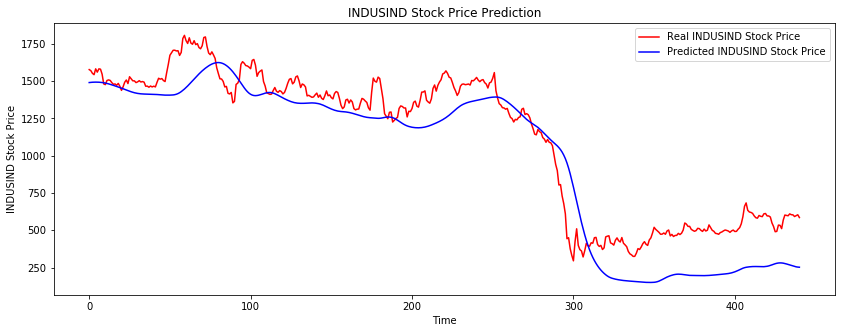

In [53]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real INDUSIND Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted INDUSIND Stock Price')
plt.title('INDUSIND Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('INDUSIND Stock Price')
plt.legend()
plt.show()

In [54]:
# source = "https://kgptalkie.com/google-stock-price-prediction-using-rnn-lstm/"

In [ ]:
# !pip install jovian --upgrade --quiet
# import jovian
# project_name = "INDUSIND BANK stock prediction using RNN-LSTM-updated"
# jovian.commit(project = project_name, enviornment = None)